In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
mpl.style.use("seaborn-colorblind")
# mpl.style.use("seaborn-pastel")

# Plot configuration
mpl.rcParams.update(
    {
        "font.size": 14,
        "figure.facecolor": "w",
        "axes.facecolor": "w",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "xtick.top": False,
        "xtick.bottom": False,
        "ytick.right": False,
        "ytick.left": False,
    }
)

### Read data in

In [3]:
df = pd.read_csv("read_until_barcodes_filtered.csv.gz", sep=",")

### Get some contextual data about the DF

In [4]:
barcode_order = sorted(df["barcode_arrangement"].unique())
barcode_front_order = sorted(df["barcode_front_id"].unique())
barcode_rear_order = sorted(df["barcode_rear_id"].unique())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255421 entries, 0 to 255420
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   read_id                   255421 non-null  object 
 1   run_id                    255421 non-null  object 
 2   start_time                255421 non-null  float64
 3   sequence_length_template  255421 non-null  int64  
 4   barcode_arrangement       255421 non-null  object 
 5   barcode_full_arrangement  255421 non-null  object 
 6   barcode_score             255421 non-null  float64
 7   barcode_front_id          255421 non-null  object 
 8   barcode_rear_id           255421 non-null  object 
 9   Group                     255421 non-null  object 
 10  Sequenced                 255421 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 21.4+ MB


### Helper functions

In [6]:
scale_y = 1e6  # bp to Mbp
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))

### Make some pretty pictures

Text(0.5, 1.0, 'Classification from arrangement')

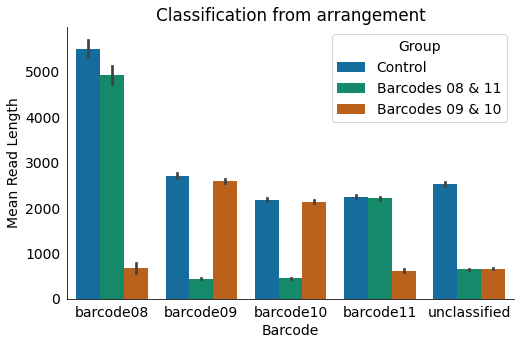

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x="barcode_arrangement", 
    y="sequence_length_template", 
    hue="Group", 
    data=df, 
    order=barcode_order,
    ax=ax,
)
ax.set_xlabel("Barcode")
ax.set_ylabel("Mean Read Length")
ax.set_title("Classification from arrangement")

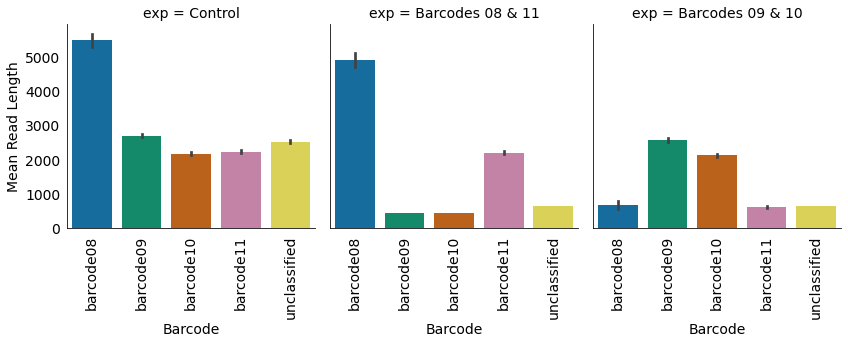

In [40]:
# As above, this is mean read length in each barcode classification. 
#  Each column is a different experiment.
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group",
    kind="bar",
    aspect=.8,
    order=barcode_order,
    data=df,
)
grid.set_titles(col_template="exp = {col_name}")
grid.set_axis_labels("Barcode", "Mean Read Length")
grid.set_xticklabels(rotation=90)
grid.tight_layout()

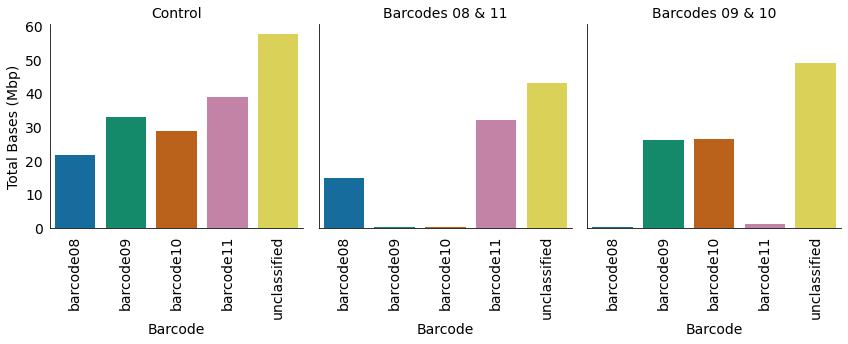

In [18]:
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group",
    kind="bar",
    aspect=.8,
    order=barcode_order,
    data=df,
    estimator=np.sum,
    ci=None,
)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Total Bases (Mbp)")
grid.set_xticklabels(rotation=90)
for ax in grid.axes.flat:
    ax.yaxis.set_major_formatter(ticks_y)
grid.tight_layout()

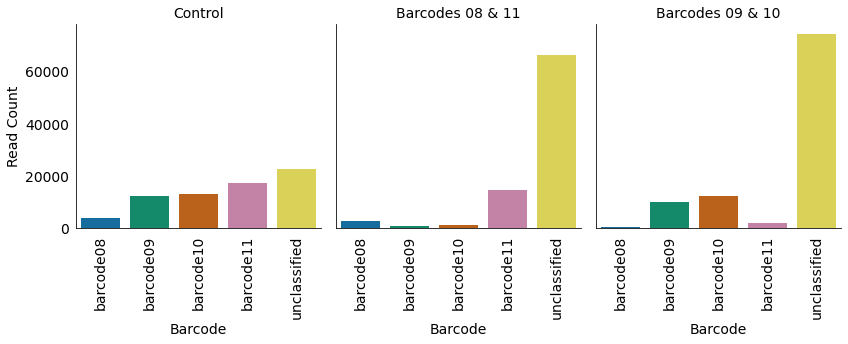

In [26]:
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group",
    kind="bar",
    aspect=.8,
    order=barcode_order,
    data=df,
    estimator=np.size,
    ci=None,
)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Read Count")
grid.set_xticklabels(rotation=90)
grid.tight_layout()

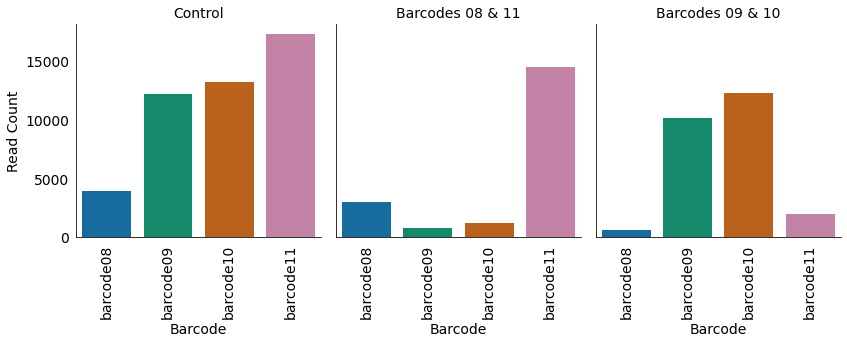

In [28]:
# Read count excluding unclassified reads
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group",
    kind="bar",
    aspect=.8,
    order=barcode_order[:-1],
    data=df[df["barcode_arrangement"].ne("unclassified")],
    estimator=np.size,
    ci=None,
)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Read Count")
grid.set_xticklabels(rotation=90)
grid.tight_layout()

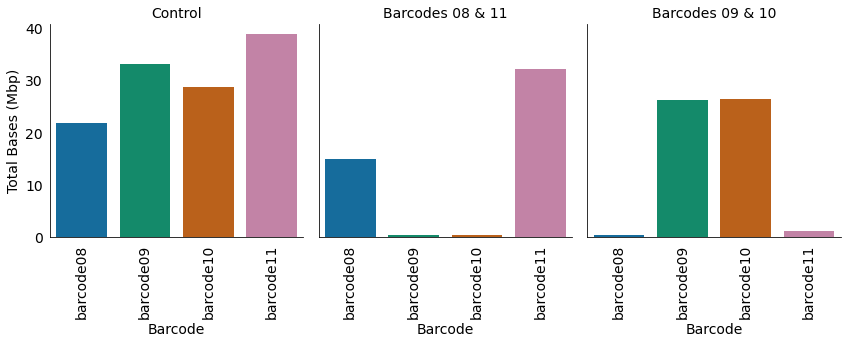

In [38]:
# Total bases excluding unclassified reads
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group",
    kind="bar",
    aspect=.8,
    order=barcode_order[:-1],
    data=df[df["barcode_arrangement"].ne("unclassified")],
    estimator=np.sum,
    ci=None,
)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Total Bases (Mbp)")
grid.set_xticklabels(rotation=90)
for ax in grid.axes.flat:
    ax.yaxis.set_major_formatter(ticks_y)
grid.tight_layout()

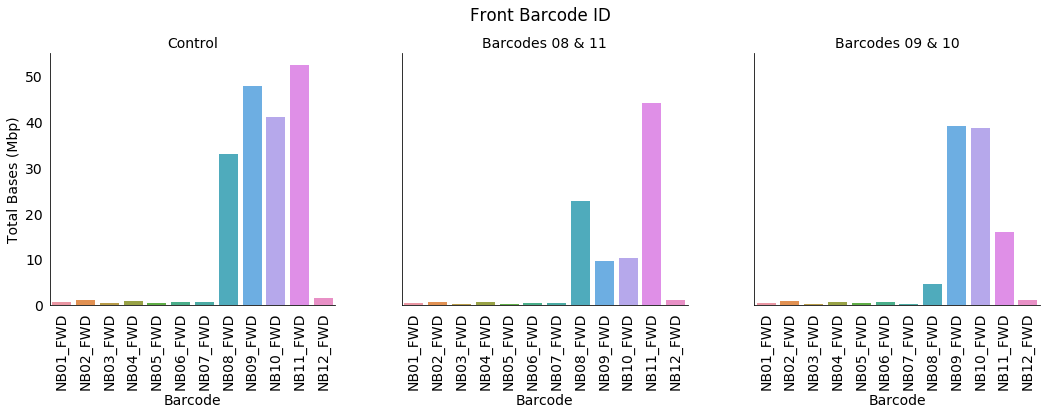

In [77]:
grid = sns.catplot(
    x="barcode_front_id", 
    y="sequence_length_template", 
    col="Group", 
    data=df, 
    order=barcode_front_order,
    kind="bar",
    estimator=np.sum,
    ci=None,
)
grid.fig.subplots_adjust(top=0.85)
grid.fig.suptitle("Front Barcode ID")
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Total Bases (Mbp)")
grid.set_xticklabels(rotation=90)
for ax in grid.axes.flat:
    ax.yaxis.set_major_formatter(ticks_y)
grid.tight_layout()

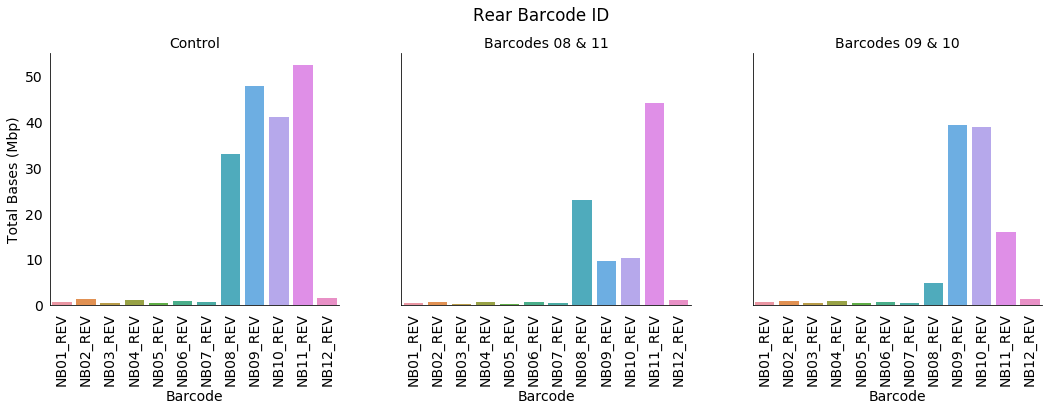

In [78]:
grid = sns.catplot(
    x="barcode_rear_id", 
    y="sequence_length_template", 
    col="Group", 
    data=df, 
    order=barcode_rear_order,
    kind="bar",
    estimator=np.sum,
    ci=None,
)
grid.fig.subplots_adjust(top=0.85)
grid.fig.suptitle("Rear Barcode ID")
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Total Bases (Mbp)")
grid.set_xticklabels(rotation=90)
for ax in grid.axes.flat:
    ax.yaxis.set_major_formatter(ticks_y)
grid.tight_layout()

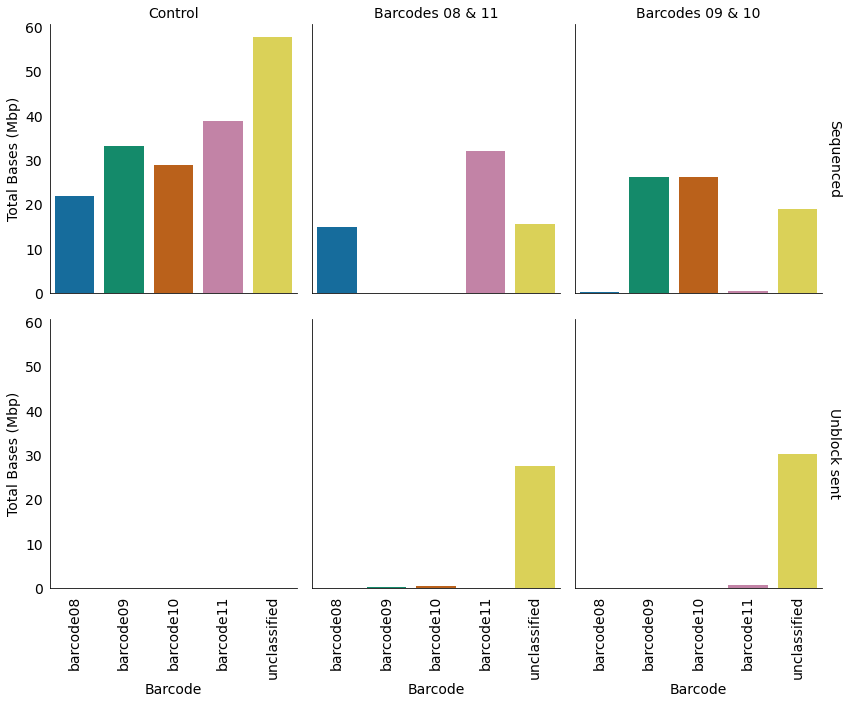

In [36]:
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group", 
    row="Sequenced",
    kind="bar",
    aspect=.8,
    order=barcode_order,
    data=df,
    estimator=np.sum,
    ci=None,
    margin_titles=True,
)
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.set_axis_labels("Barcode", "Total Bases (Mbp)")
grid.set_xticklabels(rotation=90)
for ax in grid.axes.ravel():
    ax.yaxis.set_major_formatter(ticks_y)
grid.tight_layout()

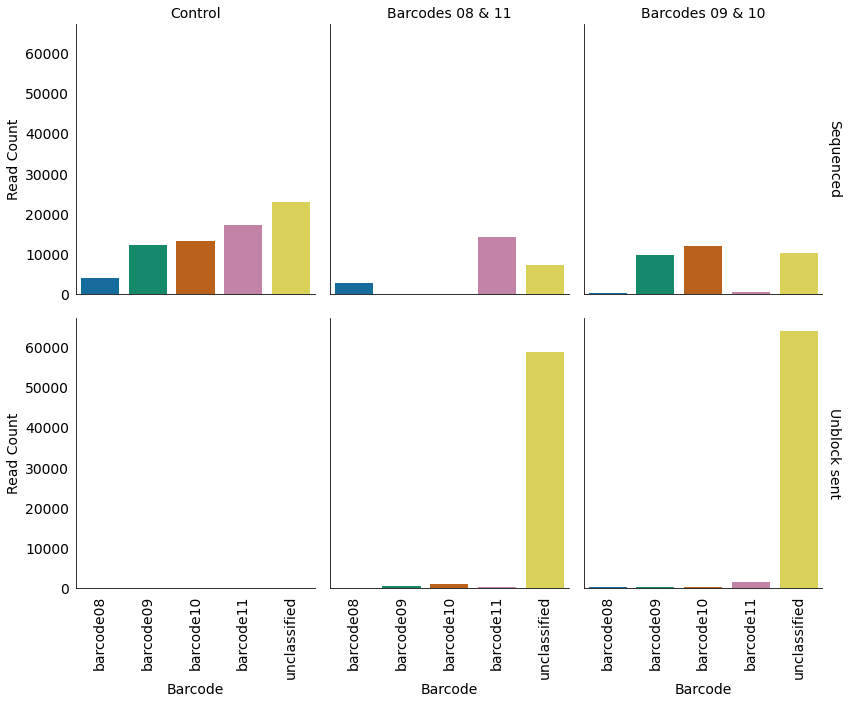

In [39]:
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group", 
    row="Sequenced",
    kind="bar",
    aspect=.8,
    order=barcode_order,
    data=df,
    estimator=np.size,
    ci=None,
    margin_titles=True,
)
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.set_axis_labels("Barcode", "Read Count")
grid.set_xticklabels(rotation=90)
grid.tight_layout()

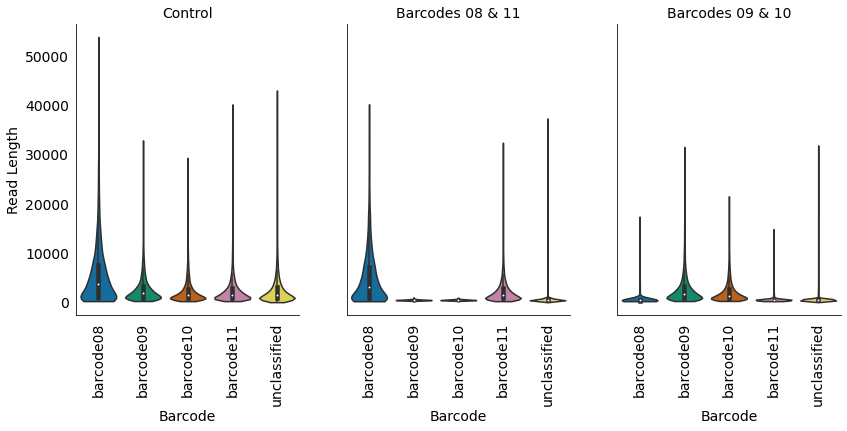

In [39]:
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group",
    kind="violin",
    aspect=.8,
    order=barcode_order,
    data=df,
    cut=0,
    scale="width",
)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Read Length")
grid.set_xticklabels(rotation=90)
grid.tight_layout()



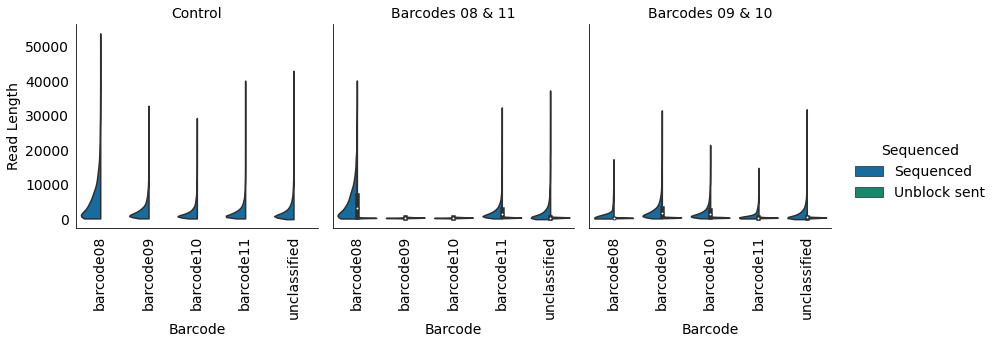

In [41]:
# Distribution of read lengths in each experiment, barcode and 
#   whether an unblock was sent.
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group", 
    hue="Sequenced",
    data=df, 
    kind="violin",
    aspect=.8,
    order=barcode_order,
    cut=0,
    scale="width",
    split=True,
)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Read Length")
grid.set_xticklabels(rotation=90)
grid.tight_layout()

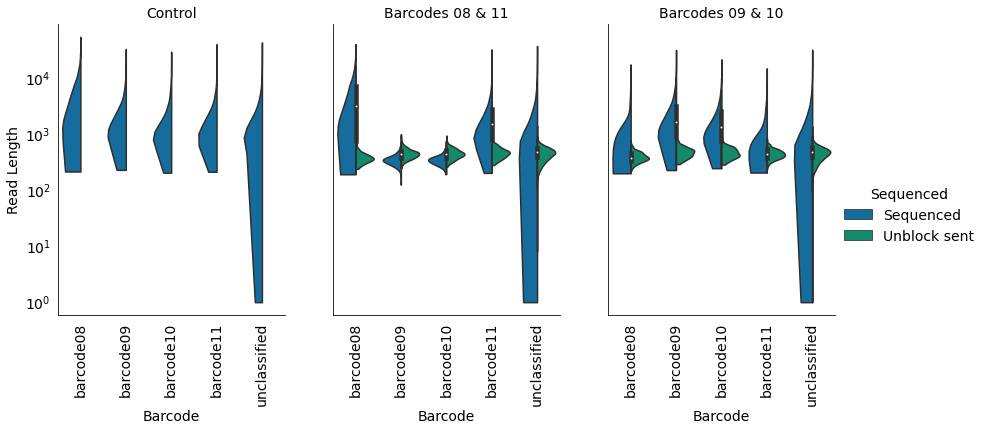

In [40]:
# Distribution of read lengths in each experiment, barcode and 
#   whether an unblock was sent. LOG scale
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group",
    kind="violin",
    aspect=.8,
    order=barcode_order,
    data=df,
    cut=0,
    scale="width",
    hue="Sequenced",
    split=True,
)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Read Length")
grid.set_xticklabels(rotation=90)

grid.set(yscale="log")
grid.tight_layout()


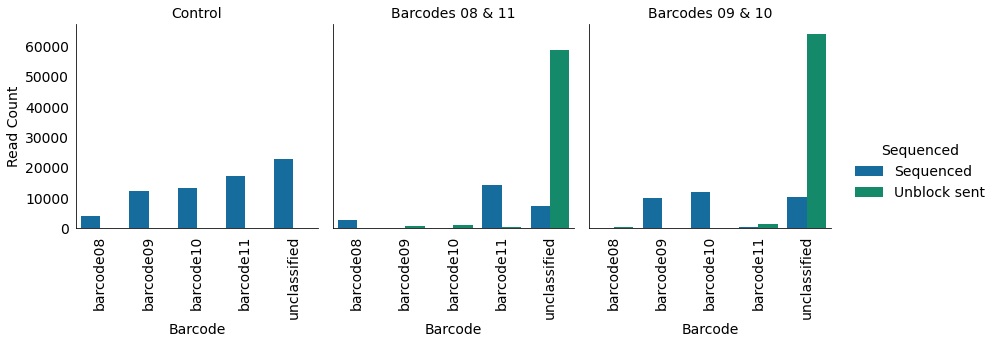

In [35]:
# Read count when grouped by experiment (col), barcode and unblock sent
grid = sns.catplot(
    x="barcode_arrangement", 
    y="sequence_length_template",
    col="Group",
    kind="bar",
    aspect=.8,
    order=barcode_order,
    data=df,
    hue="Sequenced",
    estimator=np.size,
)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Barcode", "Read Count")
grid.set_xticklabels(rotation=90)
grid.tight_layout()

<AxesSubplot:xlabel='sequence_length_template', ylabel='Density'>

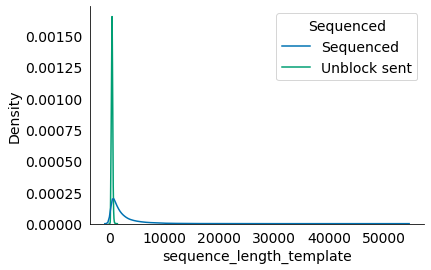

In [8]:
sns.kdeplot(
    data=df,
    hue="Sequenced",
    x="sequence_length_template",   
)